In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Extracting the Data
students_maths_data = pd.read_csv('student-por.csv', sep=';')

In [4]:
# fieldnames
students_maths_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
students_maths_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


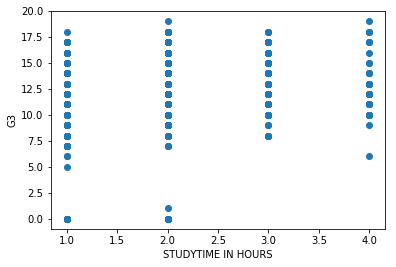

In [6]:
# StudyTime and G3 scores accordingly
plt.scatter(x=students_maths_data['studytime'], y=students_maths_data['G3'])
plt.xlabel('STUDYTIME IN HOURS')
plt.ylabel('G3')
plt.show()

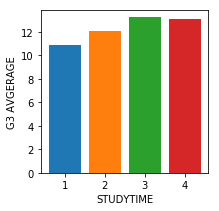

In [7]:
# Studytime vs G3 average
x = [1, 2, 3, 4]
plt.figure(figsize=(3, 3))
plt.xlabel('STUDYTIME')
plt.ylabel('G3 AVGERAGE')
for i in x:
    plt.bar(i, students_maths_data[students_maths_data['studytime']==i]['G3'].mean() )
plt.show()

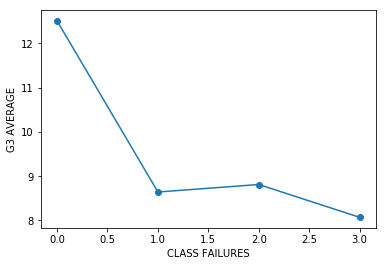

In [8]:
# Analysis of class failures vs result
class_failures = [0, 1, 2, 3]
result_mean_failures = []
plt.xlabel('CLASS FAILURES')
plt.ylabel('G3 AVERAGE')
for i in range(0, 4):
    result_mean_failures.append(students_maths_data[students_maths_data['failures']==i]['G3'].mean())
plt.scatter(class_failures, result_mean_failures)
plt.plot(class_failures, result_mean_failures)
plt.show()

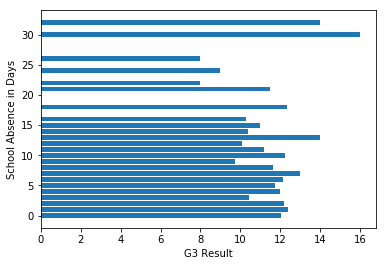

In [9]:
# Analysis of Absences vs G3
max_absence = students_maths_data['absences'].max()
min_absence = students_maths_data['absences'].min()
absence_data = []
grade_mean_absence = []
plt.xlabel('G3 Result')
plt.ylabel('School Absence in Days')
for i in range(min_absence, max_absence + 1):
    absence_data.append(i)
    grade_mean_absence.append(students_maths_data[students_maths_data['absences']==i]['G3'].mean())
plt.barh(absence_data, grade_mean_absence)
plt.show()

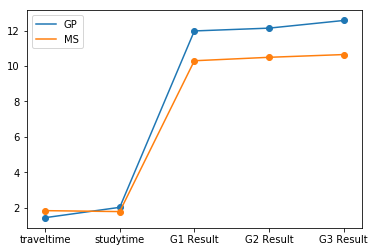

In [10]:
columns_list = ['traveltime', 'studytime', 'G1', 'G2', 'G3']
school_avg_data = students_maths_data.groupby(by='school')[columns_list].mean()
gp_mean = []
ms_mean = []
x = [1, 2, 3, 4, 5]
for i in school_avg_data.items():
    gp_mean.append(i[1]['GP'])
    ms_mean.append(i[1]['MS'])

fig, ax = plt.subplots()


ax.scatter(x, gp_mean)
ax.plot(x, gp_mean, label='GP')
ax.scatter(x, ms_mean)
ax.plot(x, ms_mean, label='MS')
ax.legend(loc=2)
ax.set_xticks(x)
ax.set_xticklabels(['traveltime', 'studytime', 'G1 Result', 'G2 Result', 'G3 Result'])